## Integrantes
* Lucio Cornejo
* Andrea Mejia
* Claudia Vivas
* Renzo Richle

1. [Paso 2](#paso-2)
    - [Adquisición de Datos](#adquisicion-de-datos)
2. [Paso 3](#paso-3)
    - [Entendimiento de los datos](#entendimiento-de-los-datos)
    - [Duplicados](#duplicados)
    - [Vacios](#vacios)
    - [Medidas de resumen para variables numéricas](#medidas-de-resumen-para-variables-numericas)
    - [Medidas de resumen para variables categóricas](#medidas-de-resumen-para-variables-categoricas)
    - [Tratamiento de datos atípicos](#tratamiento-de-datos-atipicos)
        - [Outliers por exceso](#outliers-por-exceso)
        - [Outliers por defecto](#outliers-por-defecto)
        - [Separar la base en atipicos y no atipicos](#separar-la-base-en-atipicos-y-no-atipicos)
    

# Paso 2

## Adquisicion de Datos

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [80]:
# Cargamos la base de datos
tracks = pd.read_csv(r'F:\2022-1\Analisis de datos\Tarea Academica\archive\tracks.csv')

In [81]:
tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


# Paso 3

## Entendimiento de los datos

In [82]:
print('La base tiene',tracks.shape[0], 'filas y', tracks.shape[1], 'columnas')

La base tiene 586672 filas y 20 columnas


In [83]:
print('Las columnas se la base se llaman:',tracks.columns.to_list())

Las columnas se la base se llaman: ['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists', 'id_artists', 'release_date', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']


In [84]:
tracks.dtypes
print('Se tiene los siguientes tipos de datos por columna: \n',tracks.dtypes)

Se tiene los siguientes tipos de datos por columna: 
 id                   object
name                 object
popularity            int64
duration_ms           int64
explicit              int64
artists              object
id_artists           object
release_date         object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
dtype: object


# INSERTAR DESCRIPCIÓN DE CADA VARIABLE

In [85]:
# Descripción de los datos
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [86]:
type(tracks.columns)

pandas.core.indexes.base.Index

In [87]:
# Convertimos las variables object a variables string 

tracks[['id', 'name', 'artists', 'id_artists']] = tracks[['id', 'name', 'artists', 'id_artists']].astype('string')

In [88]:
# Convertimos la variable 'release_date' a datetime64[ns]
tracks['release_date'] = pd.to_datetime(tracks['release_date'], format="%Y-%m-%d")

## Duplicados

In [89]:
# Omitimos duplicados 
print(tracks.shape)
tracks.drop_duplicates(subset = 'id', inplace=True)
print(tracks.shape)

(586672, 20)
(586672, 20)


Se observa que los datos no tienen filas con valores duplicados, es decir, no existen registros repetidos.

## Vacios

In [90]:
# Contabilizamos vacíos
vacios = pd.DataFrame(tracks.isnull().sum()).sort_values(0,ascending=True)
vacios.columns = ['vacios']
vacios['vacios%'] = round(vacios['vacios']/tracks.shape[0], 2)*100
vacios 

,vacios,vacios%
id,0,0.0
valence,0,0.0
liveness,0,0.0
instrumentalness,0,0.0
acousticness,0,0.0
speechiness,0,0.0
mode,0,0.0
loudness,0,0.0
key,0,0.0
energy,0,0.0


La columna "name" almacena 71 valores vacios.

# ¿PORQUE EXCLUIMOS LOS VALORES VACIOS? MEJOR AUN NO ELIMINAMOS PARA HACER LAS ESTADISTICAS DESCRIPTICVAS

In [91]:
# Excluimos vacíos
# print(tracks.shape) 
# tracks.dropna(inplace=True)
# print(tracks.shape)

## Medidas de resumen para variables numericas

In [92]:
# División de variables numéricas y categóricas
dfnum = tracks.select_dtypes(include=['float64', 'int64'])
dfcat = tracks.select_dtypes(exclude=['float64', 'int64'])

In [93]:
print('Variables categóricas', dfcat.shape)
print('Variables numéricas', dfnum.shape)

Variables categóricas (586672, 5)
Variables numéricas (586672, 15)


In [94]:
# estadisticas desciptivas para las variables numéricas
dfnum.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


# COMENTAR LAS CARACTERISTICAS DE CADA VARIABLE

c:\Users\c3318\anaconda3\envs\Jypiter_with_R\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


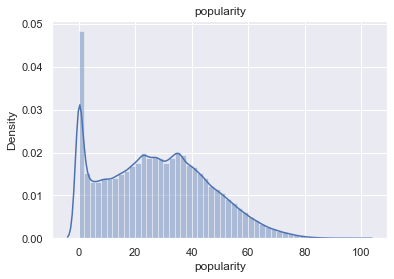

c:\Users\c3318\anaconda3\envs\Jypiter_with_R\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


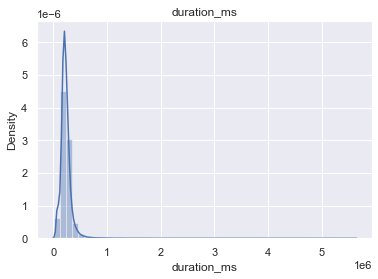

c:\Users\c3318\anaconda3\envs\Jypiter_with_R\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


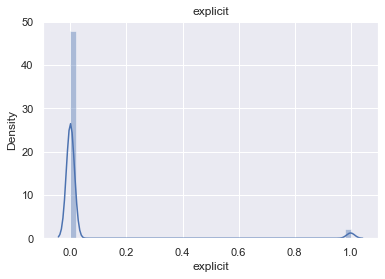

c:\Users\c3318\anaconda3\envs\Jypiter_with_R\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


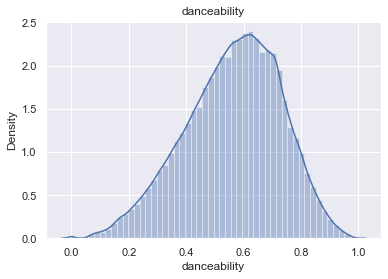

c:\Users\c3318\anaconda3\envs\Jypiter_with_R\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


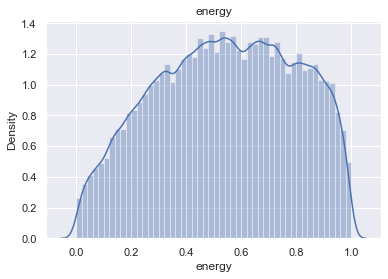

c:\Users\c3318\anaconda3\envs\Jypiter_with_R\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


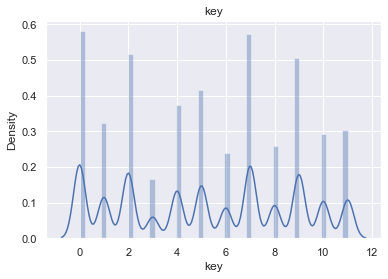

c:\Users\c3318\anaconda3\envs\Jypiter_with_R\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


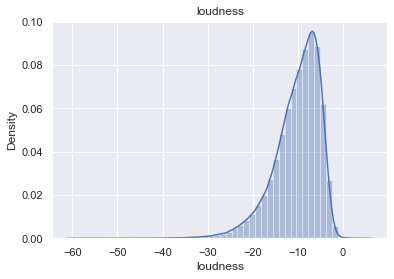

c:\Users\c3318\anaconda3\envs\Jypiter_with_R\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


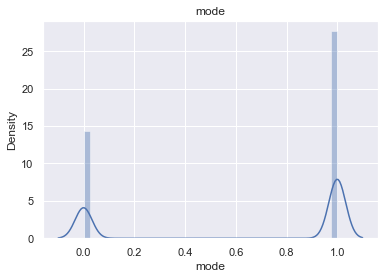

c:\Users\c3318\anaconda3\envs\Jypiter_with_R\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


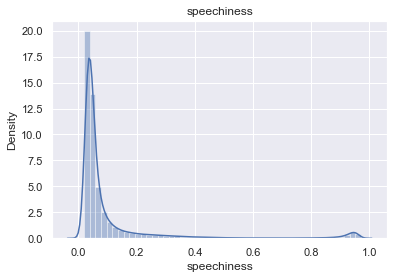

c:\Users\c3318\anaconda3\envs\Jypiter_with_R\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


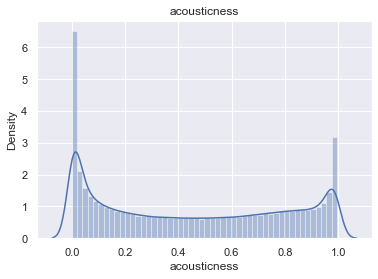

c:\Users\c3318\anaconda3\envs\Jypiter_with_R\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


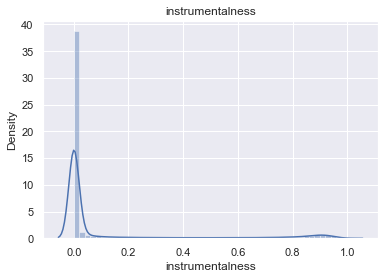

c:\Users\c3318\anaconda3\envs\Jypiter_with_R\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


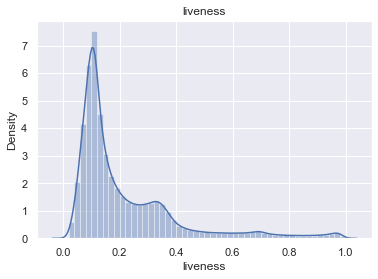

c:\Users\c3318\anaconda3\envs\Jypiter_with_R\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


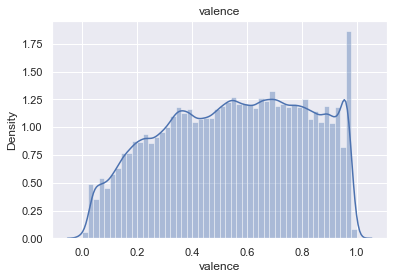

c:\Users\c3318\anaconda3\envs\Jypiter_with_R\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


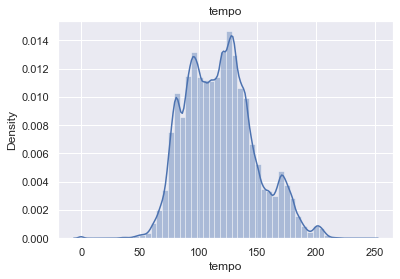

c:\Users\c3318\anaconda3\envs\Jypiter_with_R\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


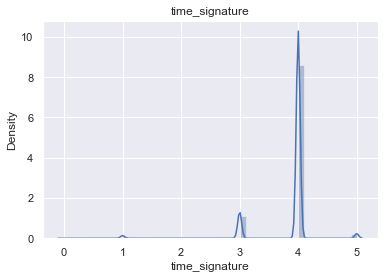

In [102]:
# Visualización de los datos numéricos
columnas_numericas = dfnum.columns.tolist()
sns.set(style="darkgrid")
for col in columnas_numericas:
    sns.distplot(dfnum[col])
    plt.title(col)
    plt.show()

# ¿TIENE SENTIDO INCLUIR A LA VARIABLE KEY, MODE Y TIME_SIGNATURE DENTRO DE LAS VARIABLES NUMERICAS O DEBERÍAN SER VARIABLES CATEGORICAS?

## Medidas de resumen para variables categoricas

In [103]:
dfcat.describe()

C:\Users\c3318\AppData\Local\Temp/ipykernel_25192/115831347.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dfcat.describe()


,id,name,artists,id_artists,release_date
count,586672,586601,586672,586672,586672
unique,586672,446474,114030,115062,19363
top,35iwgR4jXetI318WEWsa1Q,Summertime,['Die drei ???'],['3meJIgRw7YleJrmbpbJK6S'],1997-01-01 00:00:00
freq,1,101,3856,3856,5703
first,NaN,NaN,NaN,NaN,1900-01-01 00:00:00
last,NaN,NaN,NaN,NaN,2021-04-16 00:00:00


In [105]:
dfcat.columns

Index(['id', 'name', 'artists', 'id_artists', 'release_date'], dtype='object')

# 'id' y 'id_artists' son variables que no son relevantes para el analisis 

In [112]:
dfcat[['name', 'artists']].mode()

,name,artists
0,Summertime,['Die drei ???']


In [116]:
dfcat[['release_date']].mode()

,release_date
0,1997-01-01


In [115]:
dfcat['release_date'].median()

Timestamp('1992-07-31 00:00:00')

# DESCRIBIR ESTOS ESTADISTICOS, NO TENEMOS UN GRAFICO QUE PUEDE DESCRIBIR ESTAS VARIABLES

## **Tratamiento de Datos Atípicos y Estadísticas Descriptivas**

### Tratamiento de datos atípicos

#### Datos numéricos

In [93]:
descriptivesMax_num = dfnum.describe(percentiles = list(np.arange(0, 1, 0.05)))
descriptivesMax_num

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586601.000000,5.866010e+05,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000
mean,27.573212,2.300549e+05,0.044091,0.563612,0.542071,5.221594,-10.205789,0.658797,0.104870,0.449803,0.113425,0.213933,0.552306,118.467930,3.873410
std,18.369417,1.265328e+05,0.205298,0.166101,0.251910,3.519420,5.089422,0.474114,0.179902,0.348812,0.266843,0.184328,0.257673,29.762942,0.473112
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0%,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,0.000000,9.730700e+04,0.000000,0.267000,0.120000,0.000000,-19.843000,0.000000,0.027600,0.001770,0.000000,0.058900,0.121000,75.929000,3.000000
10%,2.000000,1.342190e+05,0.000000,0.334000,0.190000,0.000000,-16.893000,0.000000,0.029400,0.010500,0.000000,0.072500,0.188000,81.288000,3.000000
15%,5.000000,1.522990e+05,0.000000,0.382000,0.248000,1.000000,-15.137000,0.000000,0.030900,0.028700,0.000000,0.082500,0.244000,86.856000,4.000000
20%,9.000000,1.649200e+05,0.000000,0.420000,0.298000,2.000000,-13.886000,0.000000,0.032400,0.057700,0.000000,0.090900,0.299000,91.775000,4.000000
25%,13.000000,1.750830e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.606000,4.000000


In [97]:
# Variables que tienen valores atípicos superiores
descriptivesMax_num.loc['max'] > (descriptivesMax_num.loc['75%'] + (1.5* (descriptivesMax_num.loc['75%']-descriptivesMax_num.loc['25%']) ) )

popularity           True
duration_ms          True
explicit             True
danceability        False
energy              False
key                 False
loudness             True
mode                False
speechiness          True
acousticness        False
instrumentalness     True
liveness             True
valence             False
tempo                True
time_signature       True
dtype: bool

In [98]:
descriptivesMin = dfnum.describe(percentiles = list( np.arange(0, 1, 0.05)) )
descriptivesMin

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586601.000000,5.866010e+05,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000
mean,27.573212,2.300549e+05,0.044091,0.563612,0.542071,5.221594,-10.205789,0.658797,0.104870,0.449803,0.113425,0.213933,0.552306,118.467930,3.873410
std,18.369417,1.265328e+05,0.205298,0.166101,0.251910,3.519420,5.089422,0.474114,0.179902,0.348812,0.266843,0.184328,0.257673,29.762942,0.473112
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0%,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,0.000000,9.730700e+04,0.000000,0.267000,0.120000,0.000000,-19.843000,0.000000,0.027600,0.001770,0.000000,0.058900,0.121000,75.929000,3.000000
10%,2.000000,1.342190e+05,0.000000,0.334000,0.190000,0.000000,-16.893000,0.000000,0.029400,0.010500,0.000000,0.072500,0.188000,81.288000,3.000000
15%,5.000000,1.522990e+05,0.000000,0.382000,0.248000,1.000000,-15.137000,0.000000,0.030900,0.028700,0.000000,0.082500,0.244000,86.856000,4.000000
20%,9.000000,1.649200e+05,0.000000,0.420000,0.298000,2.000000,-13.886000,0.000000,0.032400,0.057700,0.000000,0.090900,0.299000,91.775000,4.000000
25%,13.000000,1.750830e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.606000,4.000000


In [99]:
# Variables que tienen valores atípicos inferiores
descriptivesMin.loc['min'] < ( descriptivesMin.loc['25%'] + (1.5* (descriptivesMax_num.loc['75%']-descriptivesMax_num.loc['25%']) ) ) 

popularity           True
duration_ms          True
explicit            False
danceability         True
energy               True
key                  True
loudness             True
mode                 True
speechiness          True
acousticness         True
instrumentalness     True
liveness             True
valence              True
tempo                True
time_signature       True
dtype: bool

In [100]:
dfnum.describe().quantile(0.5)

popularity              27.286606
duration_ms         222480.926313
explicit                 0.022046
danceability             0.570306
energy                   0.545536
key                      5.110797
loudness                -7.861500
mode                     0.829399
speechiness              0.090585
acousticness             0.435901
instrumentalness         0.061487
liveness                 0.199131
valence                  0.558153
tempo                  117.927465
time_signature           4.000000
Name: 0.5, dtype: float64

In [101]:
dfnum.columns

Index(['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

Variables categóricas (con representacion numérica): \
explicit, key y mode. 

In [16]:
# Variables con valores atípicos
dfnum_outlier = dfnum[['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']]

In [17]:
dfnum_outlier.describe()

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586601.000000,5.866010e+05,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000
mean,27.573212,2.300549e+05,0.563612,0.542071,-10.205789,0.104870,0.449803,0.113425,0.213933,0.552306,118.467930,3.873410
std,18.369417,1.265328e+05,0.166101,0.251910,5.089422,0.179902,0.348812,0.266843,0.184328,0.257673,29.762942,0.473112
min,0.000000,3.344000e+03,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750830e+05,0.453000,0.343000,-12.891000,0.034000,0.096900,0.000000,0.098300,0.346000,95.606000,4.000000
50%,27.000000,2.149070e+05,0.577000,0.549000,-9.242000,0.044300,0.422000,0.000024,0.139000,0.564000,117.387000,4.000000
75%,41.000000,2.638670e+05,0.686000,0.748000,-6.481000,0.076300,0.784000,0.009550,0.278000,0.769000,136.324000,4.000000
max,100.000000,5.621218e+06,0.991000,1.000000,5.376000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


In [104]:
dfnum.columns

Index(['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

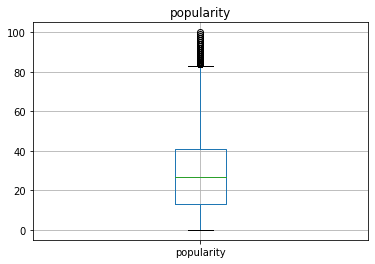

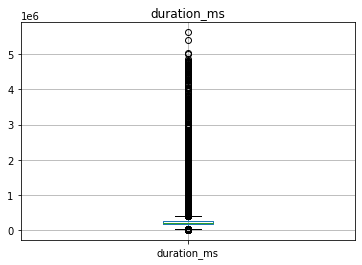

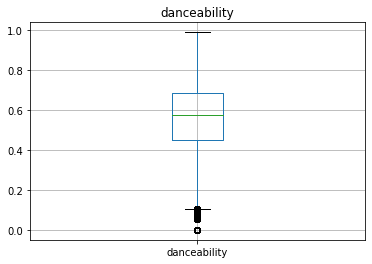

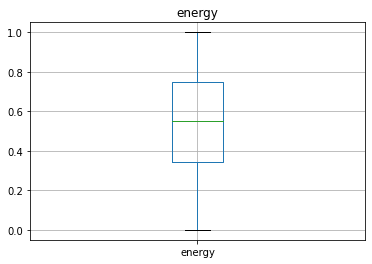

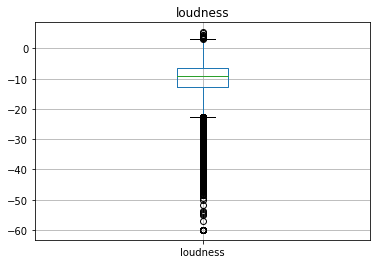

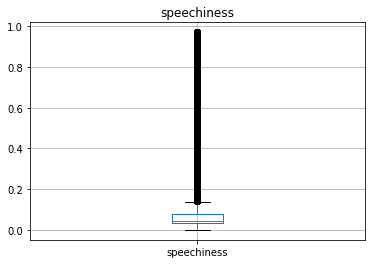

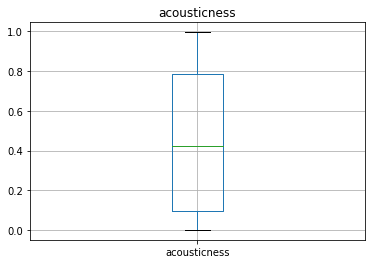

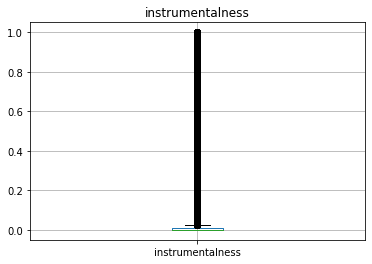

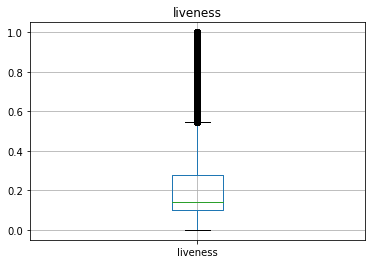

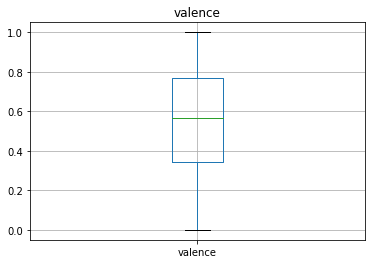

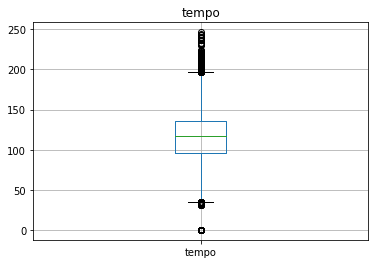

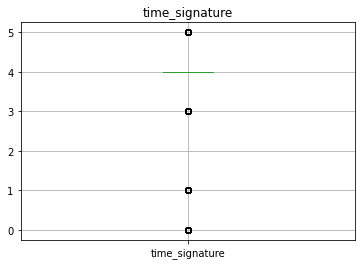

In [18]:
columnas = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature']
for col in columnas:
    dfnum_outlier.boxplot(column = [col])
    plt.title(col)
    plt.show()


In [19]:
# Podemos definir una función que haga lo mismo para cualquier columna numérica
def loc_outliers(df, columna):
  q1 = df[columna].quantile(0.25)
  q3 = df[columna].quantile(0.75)
  iqr = q3 - q1
  ul = q3 + 1.5*iqr
  ll = q1 - 1.5*iqr
  return (df[columna] > ul) | (df[columna] < ll) 

In [20]:
# Define una función que encuentre todos los outliers por exceso
def loc_outliers_exceso(df, columna):
  q1 = df[columna].quantile(0.25)
  q3 = df[columna].quantile(0.75)
  iqr = q3 - q1
  ul = q3 + 1.5*iqr
  return (df[columna] > ul)

# Define una función que encuentre todos los outliers por defecto
def loc_outliers_defecto(df, columna):
  q1 = df[columna].quantile(0.25)
  q3 = df[columna].quantile(0.75)
  iqr = q3 - q1
  ll = q1 - 1.5*iqr
  return (df[columna] < ll)

In [21]:
# Reemplazamos todos los outliers por exceso de la columna "antiguedad" por el máximo valor No outlier
for col in columnas:
    dfnum_outlier.loc[loc_outliers_exceso(dfnum_outlier, col)] = dfnum_outlier.loc[loc_outliers_exceso(dfnum_outlier, col)==False, col].max()
    dfnum_outlier.loc[loc_outliers_defecto(dfnum_outlier, col)] = dfnum_outlier.loc[loc_outliers_defecto(dfnum_outlier, col)==False, col].min()

C:\Users\HP\AppData\Local\Temp\ipykernel_16208\3525050936.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnum_outlier.loc[loc_outliers_exceso(dfnum_outlier, col)] = dfnum_outlier.loc[loc_outliers_exceso(dfnum_outlier, col)==False, col].max()


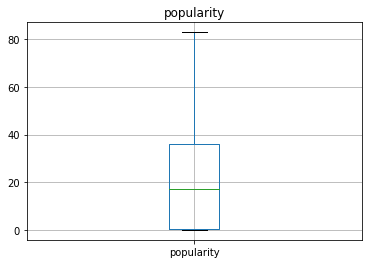

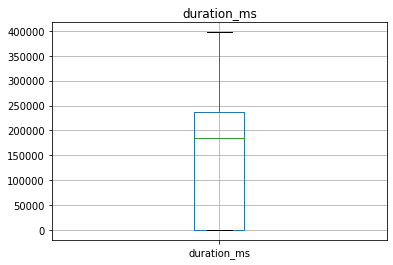

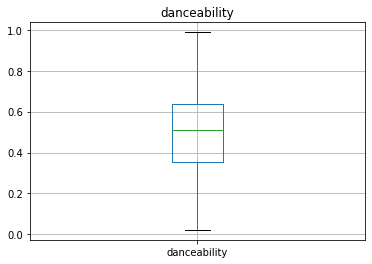

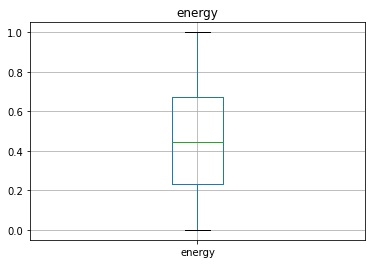

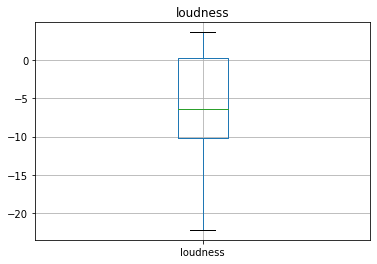

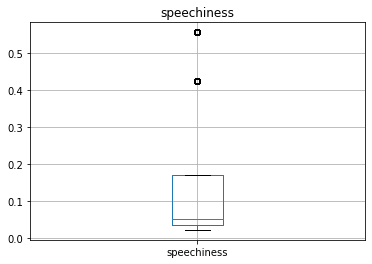

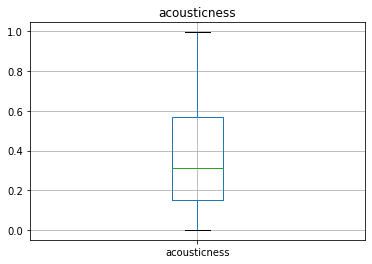

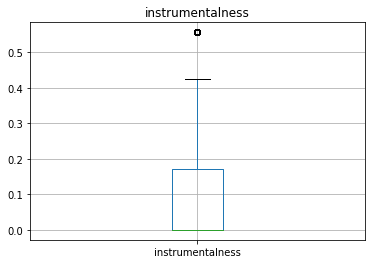

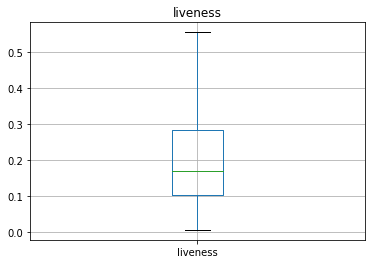

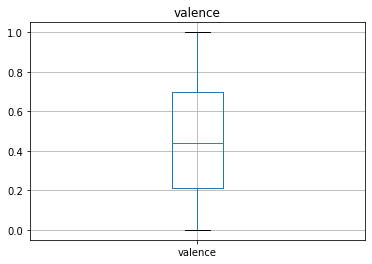

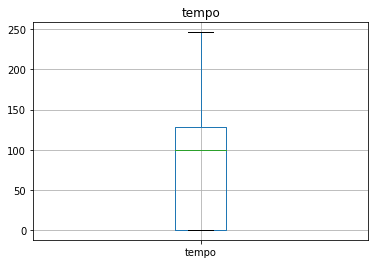

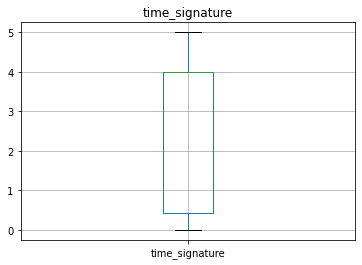

In [22]:
# Volvemos a generar boxplots para verificar imputaciones
for col in columnas:
    dfnum_outlier.boxplot(column = [col])
    plt.title(col)
    plt.show()

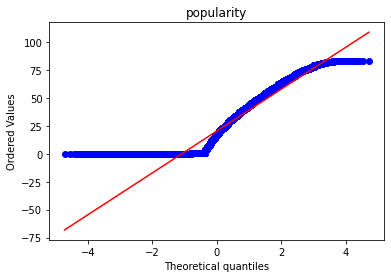

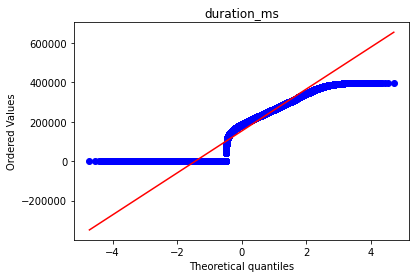

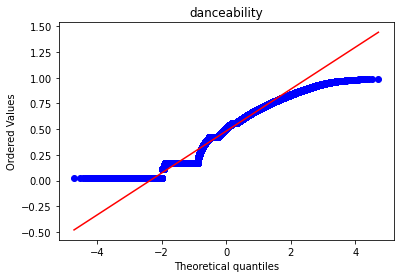

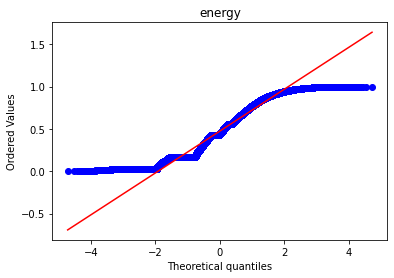

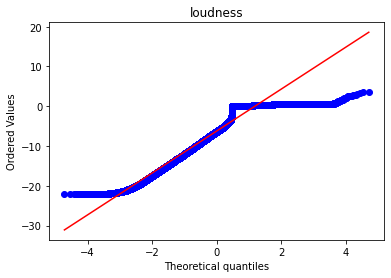

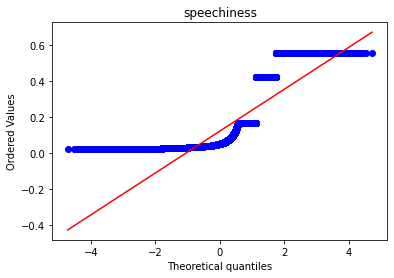

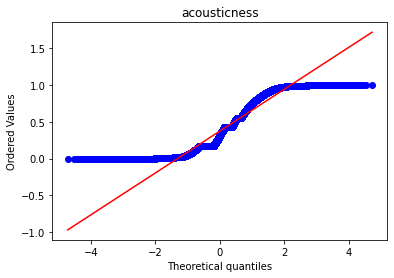

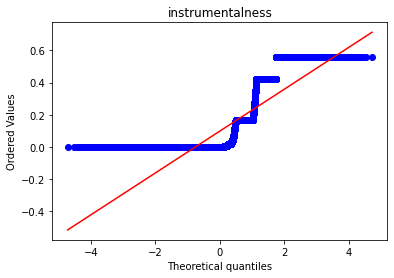

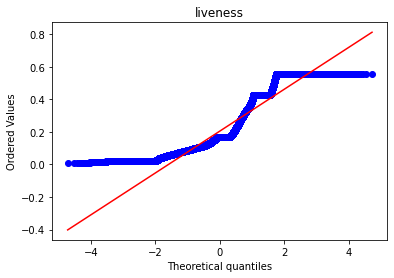

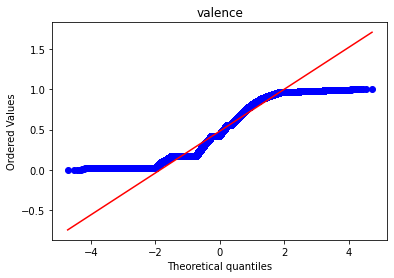

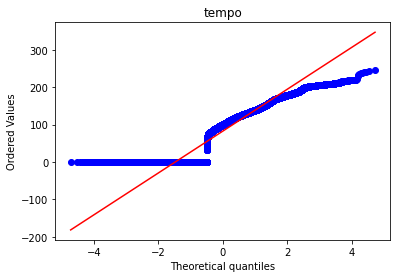

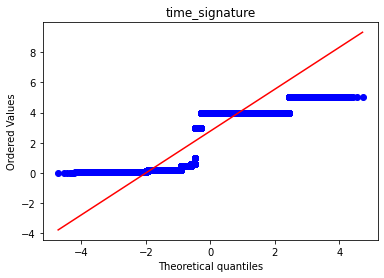

In [23]:
# Graficamos el Q-Q plot de cada variable
# ¿Qué variables aparentemente siguen una distribución normal/gaussiana?
import pylab 
import scipy.stats as stats

# La funcion select_dtypes genera un data frame formado únicamente por
# columnas del tipo indicado como argumento
for col in dfnum_outlier.select_dtypes('number').columns:
  stats.probplot(dfnum_outlier[col], dist = "norm", plot = plt)
  plt.title(col)
  pylab.show()